In [59]:
using LinearAlgebra
include("hconstruct.jl")

test_construct2D_low_rank (generic function with 1 method)

In [2]:
function readfile(filename)
    S = read(filename, String)
    M = map(x->parse(Float64, x), split(S))
    n = Int(round(sqrt(length(M))))
    copy(reshape(M, n, n)')
end

readfile (generic function with 1 method)

In [5]:
M = readfile("flap/FSEMonesideN1023P3.txt")

3070×3070 Array{Float64,2}:
  3.93709      -8.90002       0.0          …   0.0        0.0       0.0    
  8.90002       4.14674       0.0              0.0        0.0       0.0    
 -1.31336      -0.748759      3.93709          0.0        0.0       0.0    
  0.748759      0.609229      8.90002          0.0        0.0       0.0    
 -0.171814     -0.033494     -1.31336          0.0        0.0       0.0    
  0.033494      0.00944697    0.748759     …   0.0        0.0       0.0    
 -0.0666564    -0.00836043   -0.171814         0.0        0.0       0.0    
  0.00836043    0.00152178    0.033494         0.0        0.0       0.0    
 -0.0347651    -0.00323271   -0.0666564        0.0        0.0       0.0    
  0.00323271    0.000436683   0.00836043       0.0        0.0       0.0    
 -0.0211055    -0.00156186   -0.0347651    …   0.0        0.0       0.0    
  0.00156186    0.000167982   0.00323271       0.0        0.0       0.0    
 -0.0140699    -0.000865243  -0.0211055        0.0        0.

In [136]:
size(M)

(3070, 3070)

In [137]:
MM = (M + M');

In [179]:
include("hconstruct.jl")
MM = (M + M');
MM = MM[end-2047:end,end-2047:end]
H = construct_hmat(MM, 64, 1e-6, 5, -1)

Hmat
  A: Array{Float64}((0,)) Float64[]
  B: Array{Float64}((0,)) Float64[]
  C: Array{Float64}((0,)) Float64[]
  CC: Array{Float64}((0,)) Float64[]
  P: Array{Int64}((0,)) Int64[]
  is_rkmatrix: Bool false
  is_fullmatrix: Bool false
  is_hmat: Bool true
  is_transposed: Bool false
  m: Int64 2048
  n: Int64 2048
  children: Array{Hmat}((2, 2))


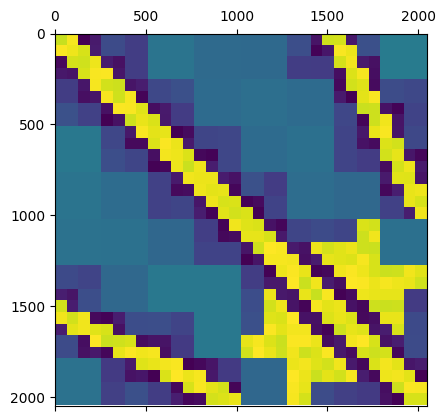

PyObject <matplotlib.image.AxesImage object at 0x1ce3e8748>

In [180]:
matshow(H)

In [182]:
include("hconstruct.jl")
verify_matvec_error(H, MM)
verify_matrix_error(H, MM)
G = verify_lu_error(H);

Matvec Error = 1.571105382437093e-10


Matrix Error = 2.870620612810506e-10
Solve Error = 0.059884664252173564
LU Matrix Error = 0.023335621723964035


2048-element Array{Int64,1}:
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
   11
   12
   13
    ⋮
 2037
 2038
 2039
 2040
 2041
 2042
 2043
 2044
 2045
 2046
 2047
 2048

In [213]:
include("tools.jl")
include("hconstruct.jl")
M = readfile("FSEMonesideN1023P3.txt")
MM = (M + M');
MM = MM[end-2047:end,end-2047:end]
H = construct_hmat(MM, 64, 1e-3, 5, -1)
verify_matvec_error(H, MM)
verify_matrix_error(H, MM)
G = verify_lu_error(H);
lu!(H);
op = x->H\x
g0 = rand(2048)
g = MM*g0
y1,err1 = pygmres_with_call_back(MM, g)
y2,err2 = pygmres_with_call_back(MM, g, op)
semilogy(err1, "o--", label="no preconditioner")
semilogy(err2, "*--", label="HLU preconditioner")
xlabel("iteration")
ylabel("$||r_k||_2$")
legend()
@printf("Error(No Preconditioner) = %f, Error(Preconditioner) = %f", norm(y1-g0)/norm(g0), 
                                                        norm(y2-g0)/norm(g0))

Matvec Error = 5.801456738562236e-5


Matrix Error = 1.1727139072325594e-5
Solve Error = 1.2038606121963917e-5
LU Matrix Error = 4.1749371590444144e-7
Iteration 0, Error = 0.2168310484763355
Iteration 1, Error = 0.06631196306598665
Iteration 2, Error = 0.035627272627921654
Iteration 3, Error = 0.01939197413897872
Iteration 4, Error = 0.010210446510860671
Iteration 5, Error = 0.0067165061496952914
Iteration 6, Error = 0.004507531121394461
Iteration 7, Error = 0.0035575402325005415
Iteration 8, Error = 0.002555259154736239
Iteration 9, Error = 0.002084587178073406
Iteration 10, Error = 0.0015617845435761247
Iteration 11, Error = 0.001285863610441447
Iteration 12, Error = 0.0011186460639137673
Iteration 13, Error = 0.0009386381650667176
Iteration 14, Error = 0.0008321488948871215
Iteration 15, Error = 0.0007357387598019626
Iteration 16, Error = 0.0006773668542234207
Iteration 17, Error = 0.0006268567687657573
Iteration 18, Error = 0.0005879613263340244
Iteration 19, Error = 0.0005522365662780865
Iteration 20, Error = 0.000535

Iteration 195, Error = 2.9672203839977514e-5
Iteration 196, Error = 2.939914947713508e-5
Iteration 197, Error = 2.9109218936326735e-5
Iteration 198, Error = 2.875911022091832e-5
Iteration 199, Error = 2.8419427145448196e-5
Iteration 200, Error = 2.8097368599557712e-5
Iteration 201, Error = 2.7769428236795466e-5
Iteration 202, Error = 2.7500610000719937e-5
Iteration 203, Error = 2.7252239178357186e-5
Iteration 204, Error = 2.6990113148874382e-5
Iteration 205, Error = 2.670755174319773e-5
Iteration 206, Error = 2.6398831366271924e-5
Iteration 207, Error = 2.606631986935073e-5
Iteration 208, Error = 2.572404257723211e-5
Iteration 209, Error = 2.5397178317398574e-5
Iteration 210, Error = 2.4936715825100187e-5
Iteration 211, Error = 2.4506440660602384e-5
Iteration 212, Error = 2.402185085097267e-5
Iteration 213, Error = 2.3546449399946104e-5
Iteration 214, Error = 2.3070784664755762e-5
Iteration 215, Error = 2.2509145300608697e-5
Iteration 216, Error = 2.209102948923902e-5
Iteration 217, Er

LoadError: syntax: invalid interpolation syntax: "$\"

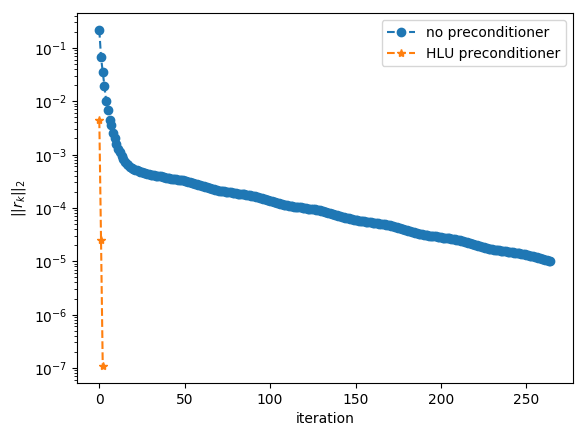

Error(No Preconditioner) = 0.012917, Error(Preconditioner) = 0.000001

In [215]:
semilogy(err1, "o--", label="no preconditioner")
semilogy(err2, "*--", label="HLU preconditioner")
xlabel("iteration")
ylabel(L"||r_k||_2")
legend()
@printf("Error(No Preconditioner) = %f, Error(Preconditioner) = %f", norm(y1-g0)/norm(g0), 
                                                                    norm(y2-g0)/norm(g0))

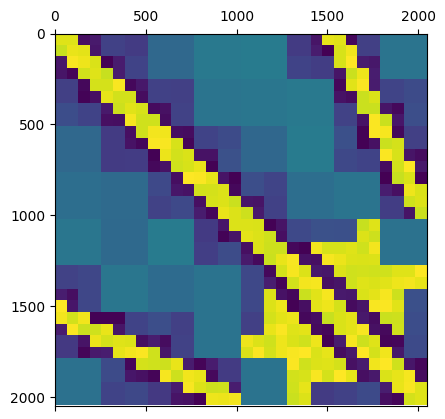

PyObject <matplotlib.image.AxesImage object at 0x1ceb42860>

In [209]:
H = construct_hmat(MM, 64, 1e-6, 5, -1);
matshow(H)

Matvec Error = 1.2507834199902222e-6


Matrix Error = 5.765703870012027e-7
Matvec Error = 8.502416410117005e-11
Matrix Error = 1.0152333768802187e-10
Solve Error = 0.16954697811432545
LU Matrix Error = 0.3688699833523879
Iteration 0, Error = 0.20909873927944392
Iteration 1, Error = 0.05641120118196462
Iteration 2, Error = 0.029126597081016916
Iteration 3, Error = 0.0177020562749183
Iteration 4, Error = 0.007563501466263831
Iteration 5, Error = 0.005499425485618735
Iteration 6, Error = 0.003330218939187194
Iteration 7, Error = 0.0023544316071657354
Iteration 8, Error = 0.0018633019376216478
Iteration 9, Error = 0.001300187648462303
Iteration 10, Error = 0.0009981804505430373
Iteration 11, Error = 0.0008155456830272088
Iteration 12, Error = 0.0006946002234015953
Iteration 13, Error = 0.0005601195138944401
Iteration 14, Error = 0.0004998146283542119
Iteration 15, Error = 0.00044862355077159504
Iteration 16, Error = 0.0004060138254770656
Iteration 17, Error = 0.0003884722602539166
Iteration 18, Error = 0.00036095001106362784
It

Iteration 193, Error = 1.9153482936548568e-5
Iteration 194, Error = 1.897474585447079e-5
Iteration 195, Error = 1.8665663632021073e-5
Iteration 196, Error = 1.8444405769815062e-5
Iteration 197, Error = 1.8266900999734607e-5
Iteration 198, Error = 1.79901821799532e-5
Iteration 199, Error = 1.7750768719709454e-5
Iteration 200, Error = 1.7535993884141366e-5
Iteration 201, Error = 1.7290245118613753e-5
Iteration 202, Error = 1.7128420671109542e-5
Iteration 203, Error = 1.6955371253736577e-5
Iteration 204, Error = 1.6704037654123283e-5
Iteration 205, Error = 1.6545695778581843e-5
Iteration 206, Error = 1.6340261923627284e-5
Iteration 207, Error = 1.6046888614026504e-5
Iteration 208, Error = 1.583573864273394e-5
Iteration 209, Error = 1.5595877811240975e-5
Iteration 210, Error = 1.5303186648580627e-5
Iteration 211, Error = 1.5026316404664118e-5
Iteration 212, Error = 1.4777250953089693e-5
Iteration 213, Error = 1.4469151046881071e-5
Iteration 214, Error = 1.4244959023928855e-5
Iteration 215,

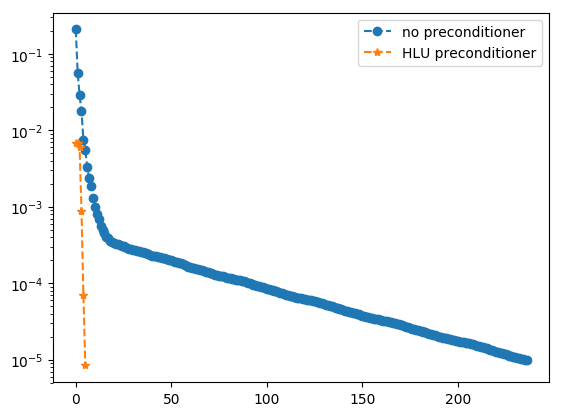

Iteration 0, Error = 0.006777536454947252
Iteration 1, Error = 0.006759598283249604
Iteration 2, Error = 0.006040847040435097
Iteration 3, Error = 0.0008956946361422967
Iteration 4, Error = 7.095602702625704e-5
Iteration 5, Error = 8.414937300515976e-6
Error(No Preconditioner) = 0.015428, Error(Preconditioner) = 0.000088

In [211]:
include("tools.jl")
include("hconstruct.jl")
MM = (M + M');
MM = MM[1:end,1:end]
H = construct_hmat(MM, 64, 1e-3, 5, -1)
H2 = construct_hmat(MM, 64, 1e-6, 5, -1)
verify_matvec_error(H, MM)
verify_matrix_error(H, MM)
verify_matvec_error(H2, MM)
verify_matrix_error(H2, MM)
G = verify_lu_error(H);
lu!(H);
op = x->H\x
g0 = rand(size(MM,1))
g = MM*g0
y1,err1 = pygmres_with_call_back(H2, g)
y2,err2 = pygmres_with_call_back(H2, g, op)
semilogy(err1, "o--", label="no preconditioner")
semilogy(err2, "*--", label="HLU preconditioner")
legend()
@printf("Error(No Preconditioner) = %f, Error(Preconditioner) = %f", norm(y1-g0)/norm(g0), 
                                                                    norm(y2-g0)/norm(g0))

Iteration 0, Error = 3.349685510940972
Iteration 1, Error = 0.020930173845954067
Iteration 2, Error = 7.256196256707573e-5
Iteration 3, Error = 4.571473021746013e-7


([0.102583, 0.023213, -0.00100688, -0.034857, -0.104398, 0.133028, 0.00522307, 0.0475717, -0.0695448, 0.0312223  …  126.179, 126.481, 126.515, 126.53, 126.441, 126.571, 126.802, 126.445, 126.644, 126.507], [3.34969, 0.0209302, 7.2562e-5, 4.57147e-7])

In [192]:
norm(MM*y-g)/norm(g)

9.8493528752934e-6

In [48]:
include("hconstruct.jl")
# lu!(H)

test_construct2D_low_rank (generic function with 1 method)

MethodError: MethodError: no method matching log(::PyCall.PyObject)
Closest candidates are:
  log(!Matched::Float16) at math.jl:1004
  log(!Matched::Complex{Float16}) at math.jl:1005
  log(!Matched::Float64) at special/log.jl:254
  ...